In [260]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
#importing the dataset
data = pd.read_csv('titanic.csv')

In [262]:
#printing the general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Variable	-  Definition	- Key
survival -	Survival	  -  0 = No, 1 = Yes
pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd
sex	- Sex
Age -	Age in years
sibsp	- # of siblings / spouses aboard the Titanic
parch - 	# of parents / children aboard the Titanic
ticket- Ticket number
fare- Passenger fare
cabin - Cabin number
embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [263]:
#Information about Columns of Dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#From above we can say the below about Dataset
# Variable	-  Definition	- Key
# survival -	Survival	  -  0 = No, 1 = Yes
# pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	- Sex
# Age -	Age in years
# sibsp	- no. of siblings / spouses aboard the Titanic
# parch - 	no. of parents / children aboard the Titanic
# ticket- Ticket number
# fare- Passenger fare
# cabin - Cabin number
# embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [264]:
# Summary statistics
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# EDA ON AGE

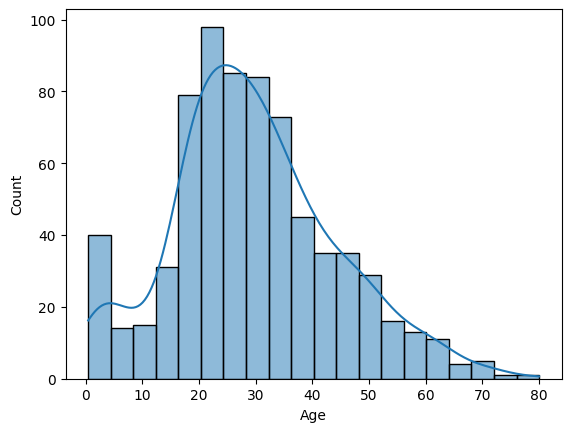

In [265]:
# Age distribution
sns.histplot(data['Age'], kde=True)
plt.show()

## UNIVARITE ANALYSIS - Single Varible
## Mean , Median , Mode - Central Tendency
## Shape of data - DIstribution of Data
## 1st Quartile, 2nd Quartile, 3rd Quartile, 4th Quartile

In [266]:
# For Age lets EDA
min_age = data["Age"].min()
print(min_age)
max_age = data["Age"].max()
print(max_age)
print(data["Age"].describe())

0.42
80.0
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


[ 54.  46. 177. 169. 118.  70.  45.  24.   9.   2.]
[ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]
<BarContainer object of 10 artists>


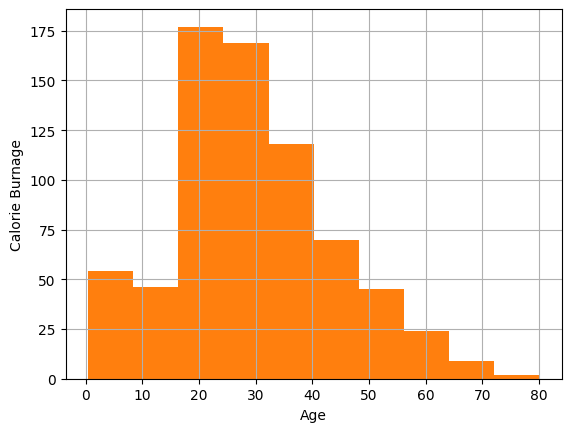

0.38910778230082704

In [267]:
#Lets Plot Age Histogram Visualization
plt.hist(data["Age"])
age_hist = plt.hist(data["Age"])
for age in age_hist:
    print(age)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Calorie Burnage")
plt.show()
data["Age"].skew()

<Axes: ylabel='Age'>

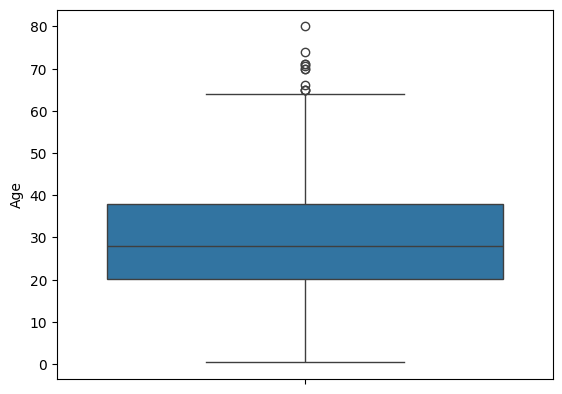

In [268]:
#outlier using box plot (SNS)
sns.boxplot(data["Age"])

In [269]:
#outlier using box plot (Plotly)
import plotly.express as px
px.box(data["Age"])

In [270]:
#let's print the outliers
for i in data["Age"]:
    if i>65:
        print(i)

66.0
71.0
70.5
71.0
80.0
70.0
70.0
74.0


In [271]:
#any missing vlaues
data.isnull().sum()
#There are 177 missigg age column which is allmost
data["Age"].isnull().sum()
#Pertage of missing data
print("Missing percentage: ", (data["Age"].isnull().sum()/len(data["Age"]))*100)

Missing percentage:  19.865319865319865


In [272]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [273]:
#Conclusion
# Age mean is 26.66
# Age max is 80
# Age min is 0.4
# Age having 177 mising data that is allmost  19.865319865319865 %
# Age is having normal distrubtion

In [274]:
#Lets fill tjhe missing age with mean
data["Age"].fillna(data["Age"].mean(),inplace=True)
#Check is there any null age?
data["Age"].isnull().sum()

0

In [275]:
data["Age"].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [276]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [277]:
data["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [278]:
data["Fare"].isnull().sum()

0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

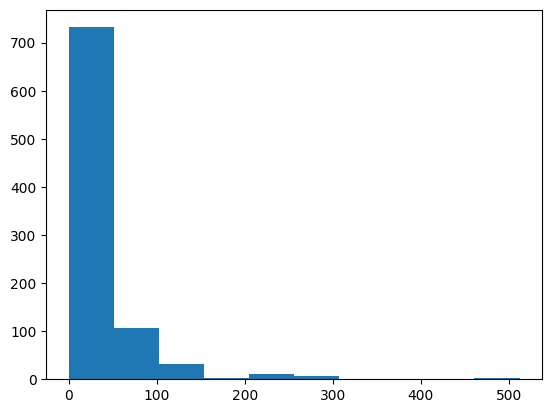

In [279]:
plt.hist(data["Fare"])

In [280]:
px.box(data["Fare"])

In [281]:
fare_skew= data["Fare"].skew()
print("Skew: ", fare_skew)
if(fare_skew>0):
    print("Positive Skewness")
elif(fare_skew<0):
    print("Negative Skewness")
else:
    print("No skew")

Skew:  4.787316519674893
Positive Skewness


In [282]:
#outliers count
count=0
for i in data["Fare"]:
    if i>65:
        count+=1
print(count)
#outliers print
for i in (data["Fare"]):
  if i>65:
    print(data["Fare"])

116
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare,

In [283]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [284]:
#Lets do Ticket
data["Ticket"].describe()

,Ticket
count,891
unique,681
top,347082
freq,7


In [285]:
print(data["Ticket"])

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object


#CATEGORIACAL COLUMNS

In [286]:
#All cat columns
cat_col = data.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [287]:
#suvided
survive_no= 0
not_survided=0
for i in data["Survived"]:
    if i==1:
        survive_no = survive_no+1
    else:
        not_survided = not_survided+1
print(survive_no)
print(not_survided)


342
549


<BarContainer object of 2 artists>

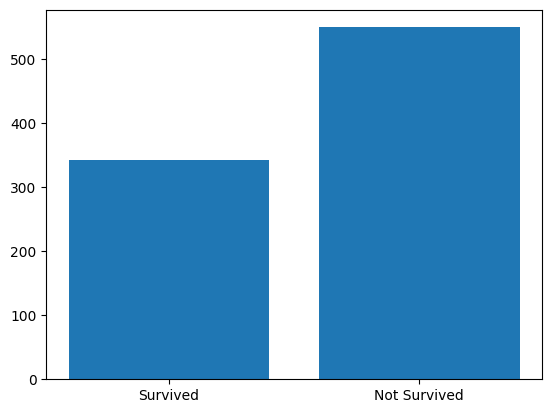

In [288]:
plt.bar(x=["Survived","Not Survived"],height=[survive_no,not_survided])

#Bivariate analysis


## Numerical - Numerical
## Numerical - Categorical
## Categorical - Caterogical

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
#crosstab
pd.crosstab(data["Survived"],data["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


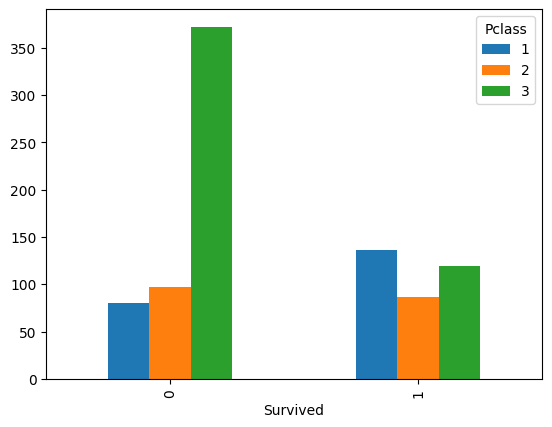

In [291]:
#plot the crosstab
pd.crosstab(data["Survived"],data["Pclass"]).plot(kind='bar')
plt.show()


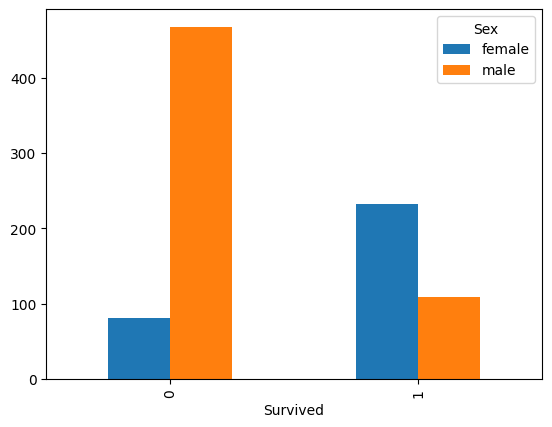

In [292]:

#crosstab
pd.crosstab(data["Survived"],data["Sex"])
#plot the crosstab
pd.crosstab(data["Survived"],data["Sex"]).plot(kind='bar')
plt.show()


In [293]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

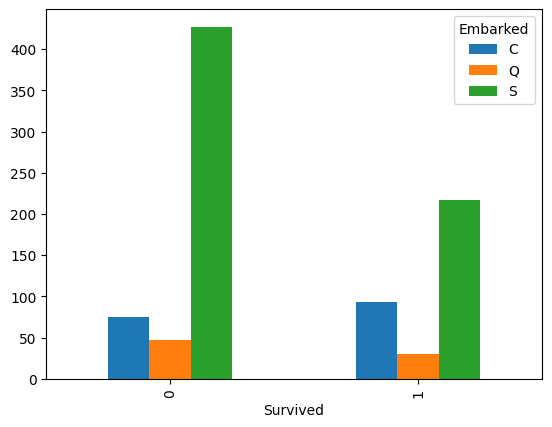

In [294]:
#crosstab
pd.crosstab(data["Survived"],data["Embarked"])
#plot the crosstab
pd.crosstab(data["Survived"],data["Embarked"]).plot(kind='bar')
plt.show()

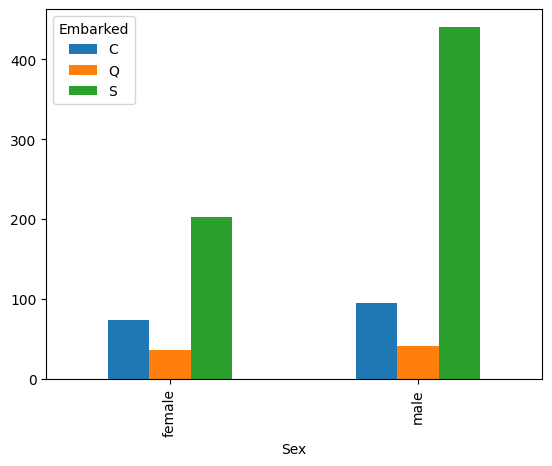

In [295]:
#crosstab
pd.crosstab(data["Sex"],data["Embarked"])
#plot the crosstab
pd.crosstab(data["Sex"],data["Embarked"]).plot(kind='bar')
plt.show()

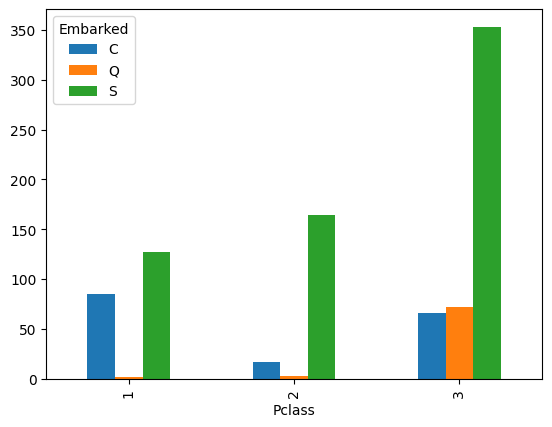

In [296]:

#crosstab
pd.crosstab(data["Pclass"],data["Embarked"])
#plot the crosstab
pd.crosstab(data["Pclass"],data["Embarked"]).plot(kind='bar')
plt.show()